## User Information
* **Name: Bob**
* **Gender: male**
* **Goal: Weight gain**
* **Fitness level: intermediate**
* **Steroids: Yes**

In [1]:
from datetime import datetime
import calendar
from calendar import monthrange
from calendar import monthcalendar
from fitness_tracker.notes.nutrition.spoonacular import FoodDatabase
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
now = datetime.utcnow()
current_year = now.year
timestamp = now.strftime("%H:%M:%S/%A/%B/%W/%Y").split("/")
months = [calendar.month_name[i] for i in range(1, 13)]

In [3]:
bob = {"email": "bob@gmail.com", "name": "Bob", "password": "bobpassword123",
       "age": "21", "gender": "male", "weight": "75", "height": "183",
       "units": "metric", "goal": "Weight gain", "activity_level": "Moderately active",
       "weight_gain_per_week": "0.5", "goal_weight": "90"}

preferred_lifts =  {"Horizontal Press": "Bench Press", "Floor Pull": "Deadlift",
                    "Squat": "Back Squat", "Vertical Press": "Overhead Press"}

In [1]:
def round_number(n):
  if n%10 < 4:
    n -= n%10
  elif n%10 <= 7:
    n -= (n%10)-5
  else:
    n += 10-n%10
  return n

# Strength Progression Graphs

### Monthly 1RM Progression

In [5]:
horizontal_press_1RM = np.sort(np.random.randint(low=90, high=130, size=12))
floor_pull_1RM = np.sort(np.random.randint(low=120, high=200, size=12))
squat_1RM = np.sort(np.random.randint(low=100, high=155, size=12))
vertical_press_1RM = np.sort(np.random.randint(low=40, high=75, size=12))

MAX_DATA = {preferred_lifts["Horizontal Press"]: horizontal_press_1RM,
            preferred_lifts["Floor Pull"]: floor_pull_1RM,
            preferred_lifts["Squat"]: squat_1RM,
            preferred_lifts["Vertical Press"]: vertical_press_1RM}

for exercise in MAX_DATA:
  for i, exercise_data in enumerate(MAX_DATA[exercise]):
    MAX_DATA[exercise][i] = round_number(exercise_data)

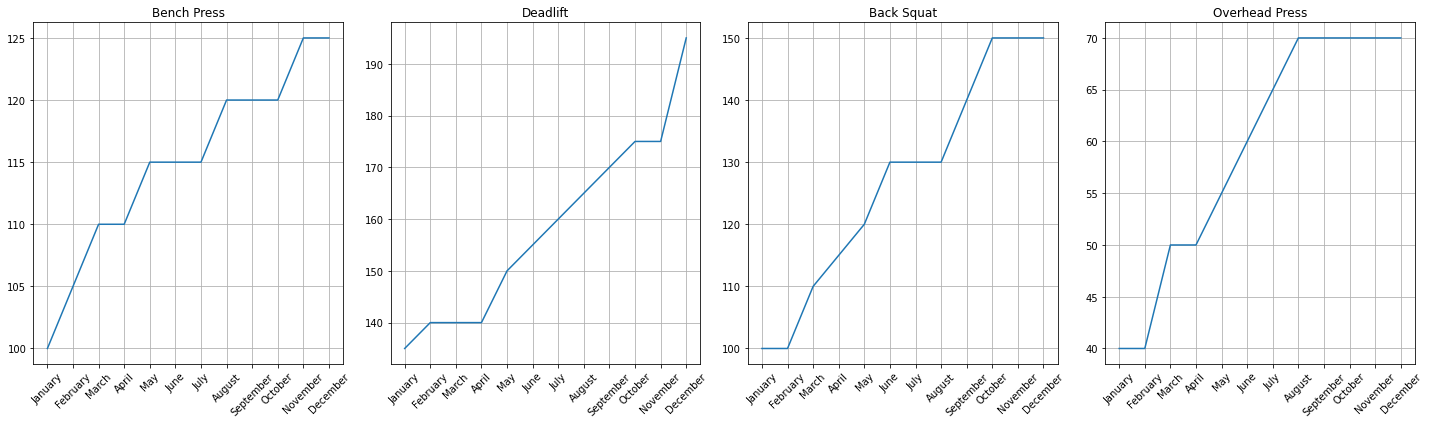

In [6]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20,6), tight_layout=True)

for i, exercise in enumerate(MAX_DATA):
  axs[i].plot(np.array(months), MAX_DATA[exercise])
  for label in axs[i].get_xticklabels():
    label.set_rotation(45)
  axs[i].grid()
  axs[i].set_title(exercise)

plt.show()

### 1RM Improvements (%)

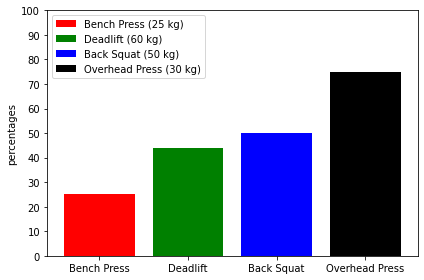

In [7]:
percentages = []
weight_increased = []
for exercise in MAX_DATA:
  diff = np.max(MAX_DATA[exercise])-np.min(MAX_DATA[exercise])
  percentage = round(diff/np.min(MAX_DATA[exercise]), 2)*100
  percentages.append(percentage)
  weight_increased.append(str(diff)+" kg")

colors = ["red", "green", "blue", "black"]
fig, ax = plt.subplots(ncols=1, nrows=1, tight_layout=True)

for i, lift in enumerate(preferred_lifts.values()):
  ax.bar(lift, percentages[i], color=colors[i], label=lift+" ("+weight_increased[i]+")")
ax.legend()
ax.set_yticks(np.arange(0, 110, 10))
plt.ylabel("percentages")

plt.show()

# Weight Progression Graphs

### Monthly Weight Progression

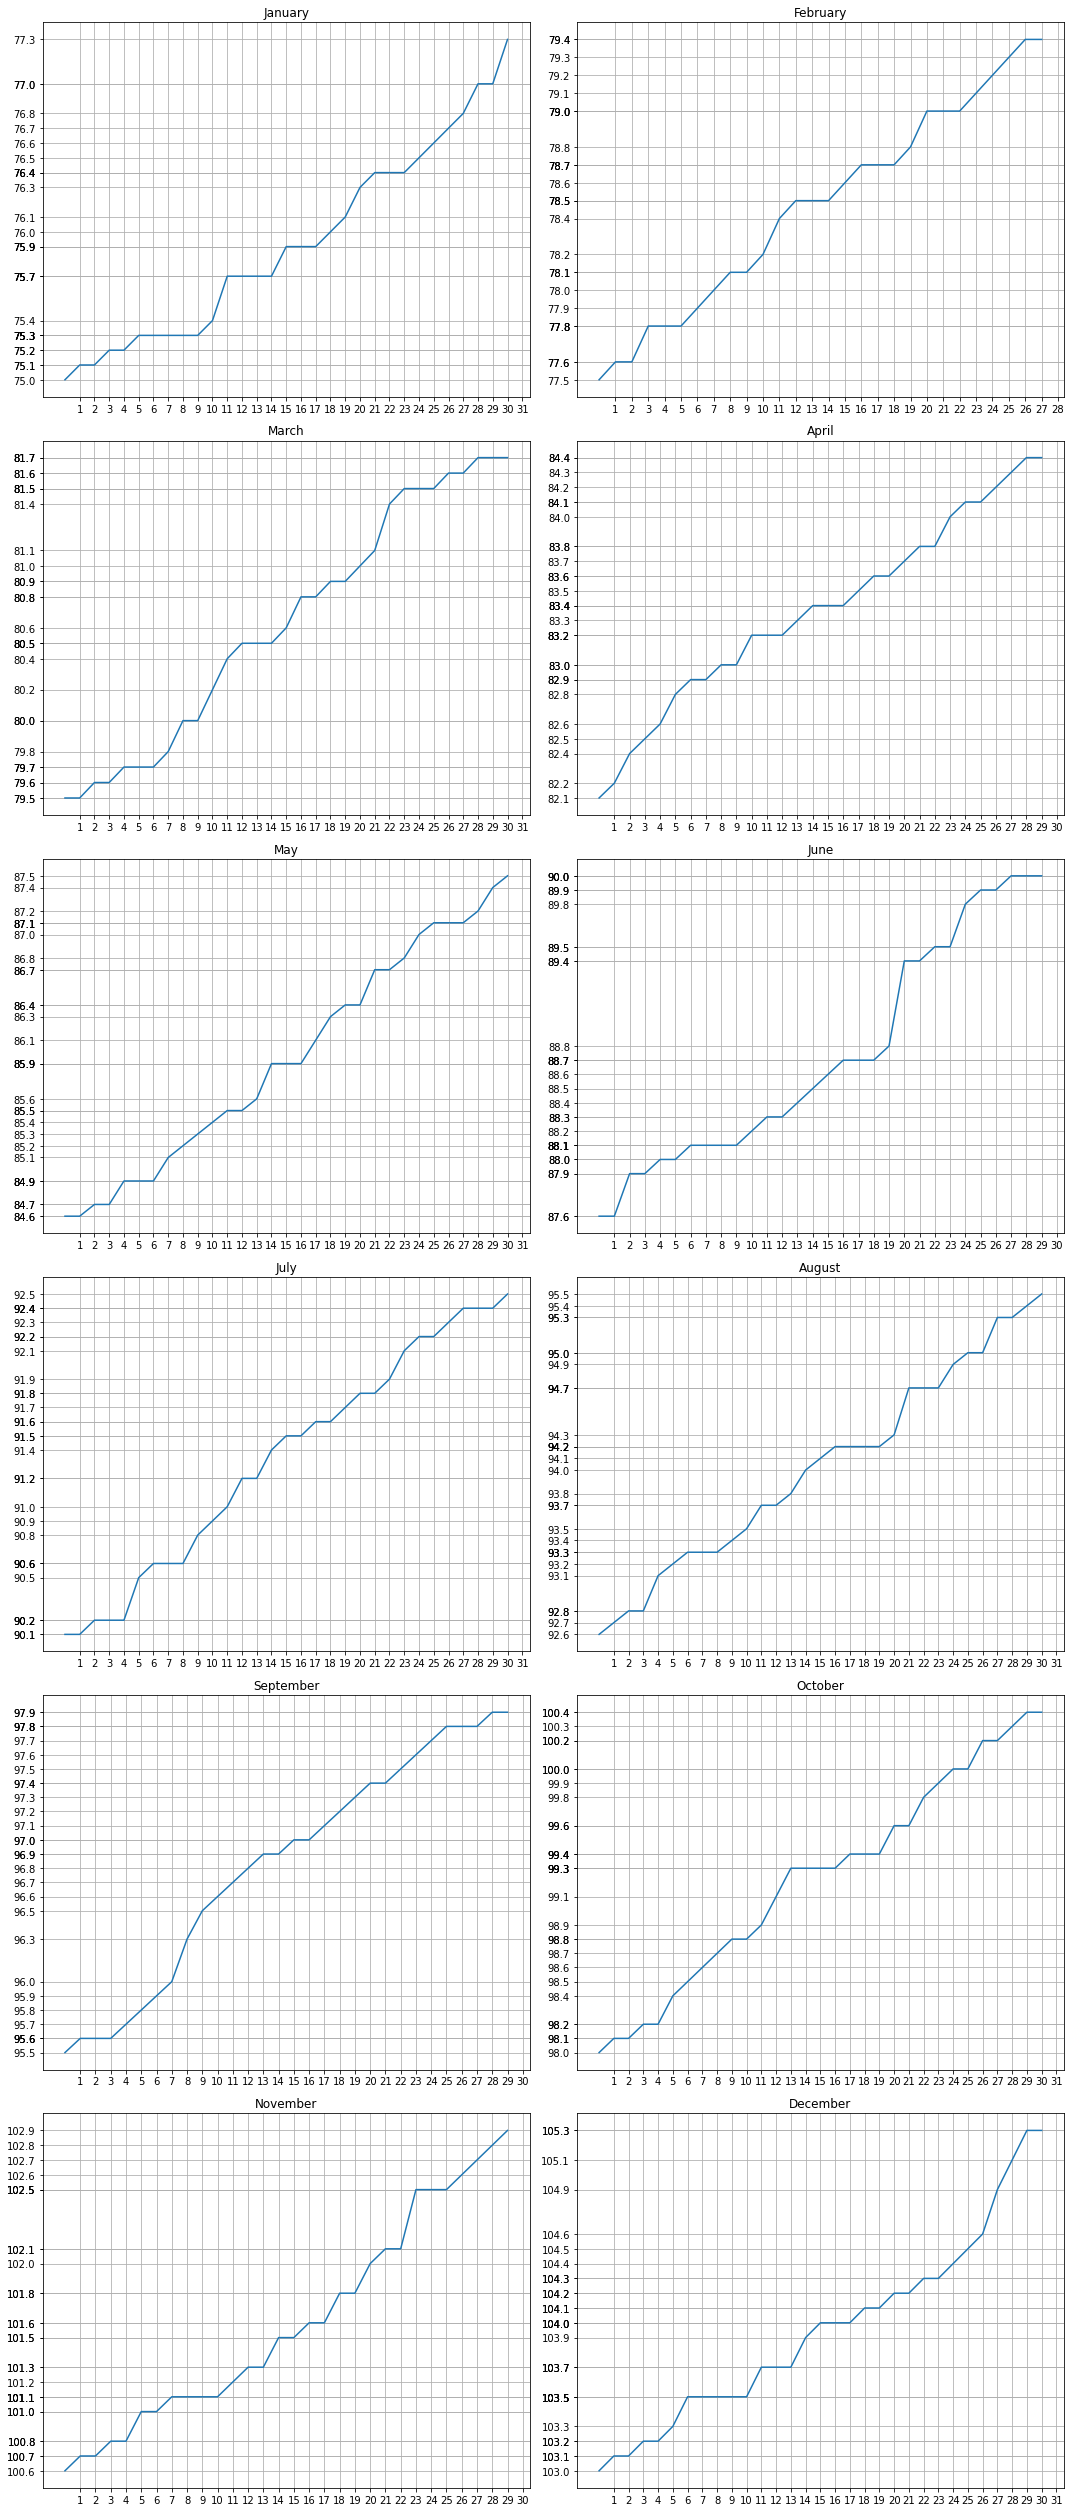

In [8]:
days_in_a_month = [monthrange(current_year, month)[1] for month in range(1, 13)]
weeks_in_a_month = [len(monthcalendar(current_year,month)) for month in range(1, 13)]

max_gain_per_month = [n_weeks*float(bob["weight_gain_per_week"]) for n_weeks in weeks_in_a_month]
max_kg_end_of_the_month = []

for i in range(len(max_gain_per_month)):
  bob_weight = float(bob["weight"])
  if len(max_kg_end_of_the_month) == 0:
    max_kg_end_of_the_month.append(max_gain_per_month[i]+bob_weight)
  else:
    max_kg_end_of_the_month.append(sum(max_gain_per_month[:i+1])+bob_weight)

weights = []
for i, month in enumerate(months):
  low = float(bob["weight"]) if i == 0 else max_kg_end_of_the_month[i-1]
  weights.append(np.around(np.sort(np.random.uniform(low=low, high=max_kg_end_of_the_month[i],
                                                     size=days_in_a_month[i])), 1))

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,35), tight_layout=True)

i = 0
for row in axs:
  for ax in row:
    ax.plot(weights[i])
    ax.set_xticks(np.arange(1, days_in_a_month[i]+1))
    ax.set_yticks(weights[i])
    ax.grid()
    ax.set_title(months[i])
    i += 1
    
plt.show()

### Yearly Weight Progression

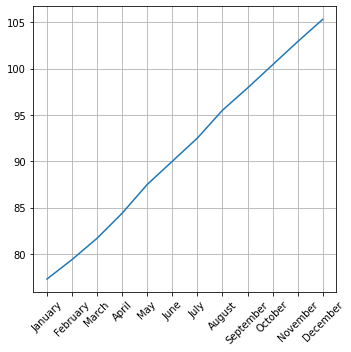

In [9]:
weights_at_the_end_of_the_month = [month_weights[-1] for month_weights in weights]
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)
ax.plot(months, weights_at_the_end_of_the_month)
ax.set_xticks(months)
for label in ax.get_xticklabels():
  label.set_rotation(45)
ax.grid()

plt.show()

# Food Graphs

In [10]:
db = FoodDatabase()
eggs_id = db.food_search("eggs", 1)[0]["id"]
eggs_info = db.food_info(eggs_id, units="g", amount=100)["nutrition"]["nutrients"]
del eggs_info[0] # remove calories 

In [11]:
macronutrients_list = ["Fat", "Saturated Fat", "Carbohydrates",
                       "Net Carbohydrates", "Sugar", "Cholesterol",
                       "Protein"]

macro_n, macro_amounts = [], []
micro_n, micro_amounts = [], []

for nutrient in eggs_info:
  if nutrient["title"] in macronutrients_list:
    macro_n.append(nutrient["title"])
    if nutrient["unit"] != "g" and nutrient["unit"] == "mg":
      nutrient_amount = nutrient["amount"] / 1000
    else:
      nutrient_amount = nutrient["amount"]
    macro_amounts.append(nutrient_amount)
  else:
    micro_n.append(nutrient["title"])
    if nutrient["unit"] == "IU": print("?")
    if nutrient["unit"] != "mg" and nutrient["unit"] == "µg":
      nutrient_amount = round(nutrient["amount"] / 1000, 6)
    else:
      nutrient_amount = nutrient["amount"]
    micro_amounts.append(nutrient_amount)

macro_n, macro_amounts, = np.array(macro_n), np.array(macro_amounts)
micro_n, micro_amounts = np.array(micro_n), np.array(micro_amounts)

?


### Macronutrients

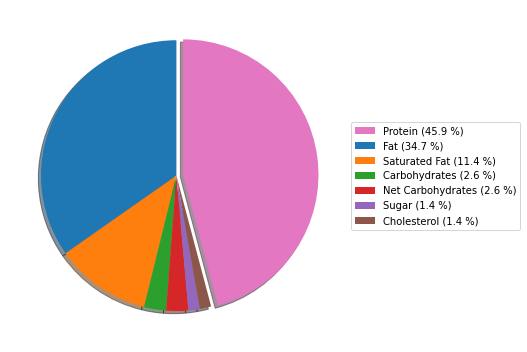

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 5), tight_layout=True, subplot_kw=dict(aspect="equal"))

explode = [0]*len(macro_n)
explode[np.argmax(macro_amounts)] = 0.05

wedges, texts = ax1.pie(macro_amounts, explode=np.array(explode), startangle=90, shadow=True)

percentages = [round(macro/np.sum(macro_amounts)*100, 1) for macro in macro_amounts]

percentage_label = "%s (%1.1f %%)"
labels = [percentage_label % (macro, percentage) for (macro, percentage) in zip(macro_n, percentages)]

for i, (wedge, label) in enumerate(zip(wedges, labels)):
  labels[i] = (wedge, label)

labels.sort(key=lambda x: float(x[1].split(" ")[-2][1:]), reverse=True)

sorted_wedges = [label[0] for label in labels]
sorted_labels = [label[1] for label in labels]

ax1.legend(sorted_wedges, sorted_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### Micronutrients

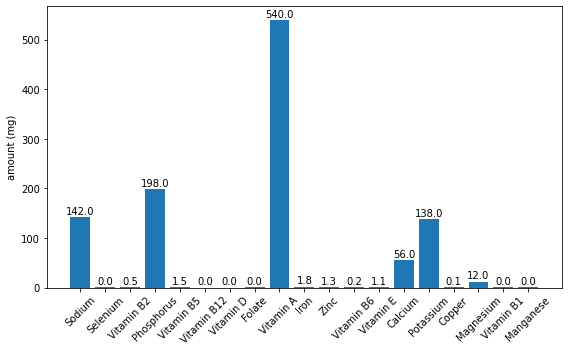

In [13]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)

ax.bar(micro_n, micro_amounts);

for label in ax.get_xticklabels():
  label.set_rotation(45)

for rect in ax.patches:
  x_value = rect.get_x()+rect.get_width()/2
  y_value = rect.get_height()
  label = "{:.1f}".format(y_value)
  ax.annotate(label, (x_value, y_value), xytext=(0,1), textcoords="offset points", ha="center", va="bottom")

plt.ylabel("amount (mg)")

plt.show()